In [10]:
import numpy as np
import matplotlib.pyplot as plt
import copy, math

In [11]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

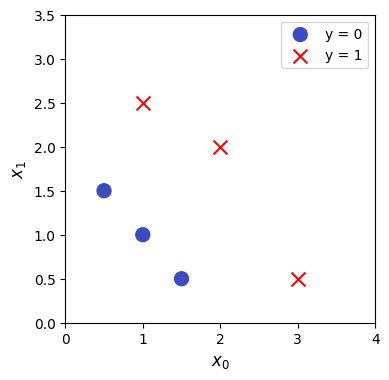

In [12]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
plt.scatter(X_train[:3, 0], X_train[:3, 1], c=y_train[:3], cmap='coolwarm', label='y = 0', marker='o', s=100)
plt.scatter(X_train[3:, 0], X_train[3:, 1], c='red', label='y = 1', marker='x', s=100)

# Set both axes to be from 0-4
ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
ax.legend()
plt.show()

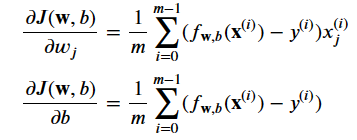

In [13]:
def sigmoid(z):

    g = 1/(1+np.exp(-z))
   
    return g

In [23]:
def compute_gradient_logistic(X, y, w, b): 
    
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.
    
    for i in range(m):
        z = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j] 
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_db, dj_dw

In [24]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


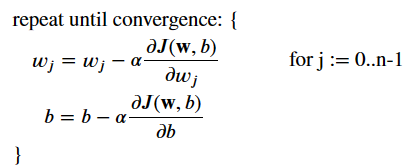

In [26]:
def compute_cost_logistic(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)         
    cost = cost / m
    return cost

In [32]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in 
    
    for i in range(num_iters):
        
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Save cost J at each iteration
        J_history.append( compute_cost_logistic(X, y, w, b) )
        
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
    
    return w, b, J_history  


In [33]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870456   
Iteration 2000: Cost 0.08460064176930081   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.042907594216820076   
Iteration 5000: Cost 0.034338477298845684   
Iteration 6000: Cost 0.028603798022120097   
Iteration 7000: Cost 0.024501569608793   
Iteration 8000: Cost 0.02142370332569295   
Iteration 9000: Cost 0.019030137124109114   

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


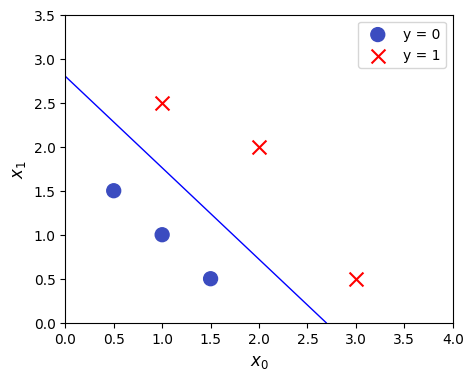

In [37]:
fig,ax = plt.subplots(1,1,figsize=(5,4))
# plot the probability 
# plt_prob(ax, w_out, b_out)

# Plot the original data
plt.scatter(X_train[:3, 0], X_train[:3, 1], c=y_train[:3], cmap='coolwarm', label='y = 0', marker='o', s=100)
plt.scatter(X_train[3:, 0], X_train[3:, 1], c='red', label='y = 1', marker='x', s=100)

# Set both axes to be from 0-4
ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
ax.legend()

# Plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0], c="blue", lw=1)

plt.show()


